#### Load & inspect the dataset

#### Clean the data

#### Explore churn patterns (EDA)

#### Preprocess for ML

#### Train a classifier

#### Evaluate model performance

#### load and inspect the dataset

In [22]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report





In [23]:
#load the dataset
df = pd.read_csv(r"C:\Users\savai\Documents\Documents\Customer Churn Prediction.csv")
#display the first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#summary statistics of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Clean the dataset

In [26]:
#check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
#fill or drop null values
df.dropna(inplace=True)

In [28]:
#clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
#check the cleaned column names
df.columns


Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [29]:
#check data types
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

#### Explore Chrun Patterns (EDA)

Churn Rate:
churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


C:\Users\savai\AppData\Local\Temp\ipykernel_28168\3950085813.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set1')


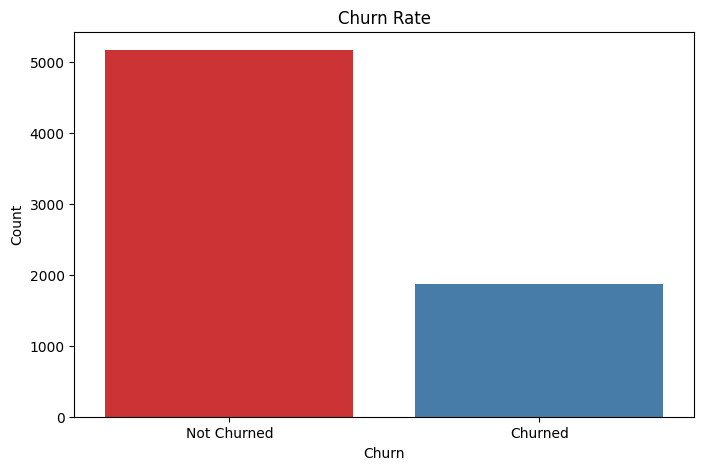

In [30]:
#churn rate
churn_rate = df['churn'].value_counts(normalize=True)
print("Churn Rate:")
print(churn_rate)
#visualize churn rate
plt.figure(figsize=(8, 5))
sns.countplot(x='churn', data=df, palette='Set1')
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [32]:
#value counts of churn
print(df['churn'].value_counts())

churn
No     5174
Yes    1869
Name: count, dtype: int64


#### Compare churn vs no-churn by features

<Axes: xlabel='churn', ylabel='tenure'>

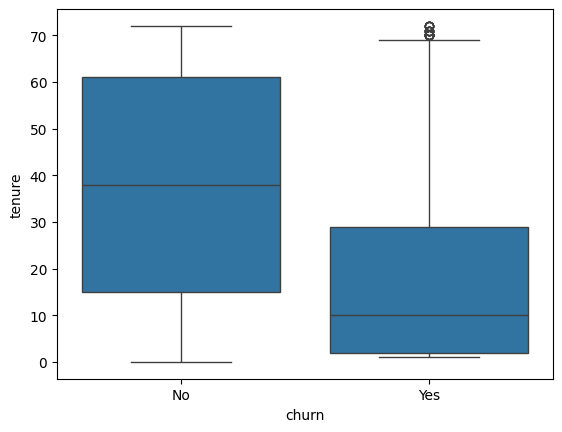

In [ ]:
#do people with shorter tenure(subscription) churn(leave) more?
sns.boxplot(x='churn', y='tenure', data=df)

In [ ]:
#answer the above question      
df.pivot_table(index='churn', values='tenure', aggfunc=['mean', 'median'])


,mean,median
,tenure,tenure
churn,,
No,37.569965,38.0
Yes,17.979133,10.0


###### analysis shows that people with shorter tenure are more likely to churn.

<Axes: xlabel='contract', ylabel='count'>

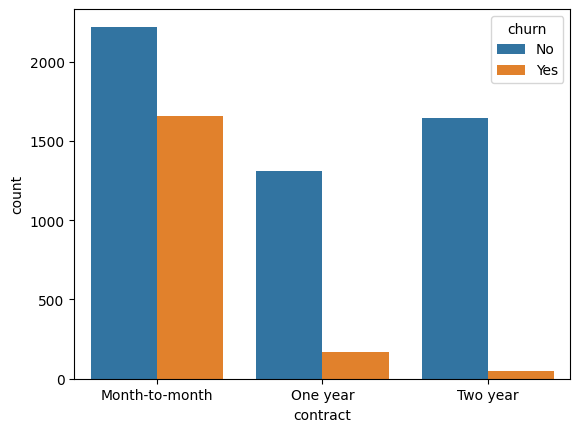

In [43]:
#what contracts do churners have?
sns.countplot(data=df, x="contract", hue="churn")

In [44]:
#answer the above question
df.pivot_table(index='contract', columns='churn', aggfunc='size')

churn,No,Yes
contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


###### contract analysis shows that month-to-month contracts have the highest churn rate, while two-year contracts have the lowest churn rate.

<Axes: xlabel='internetservice', ylabel='count'>

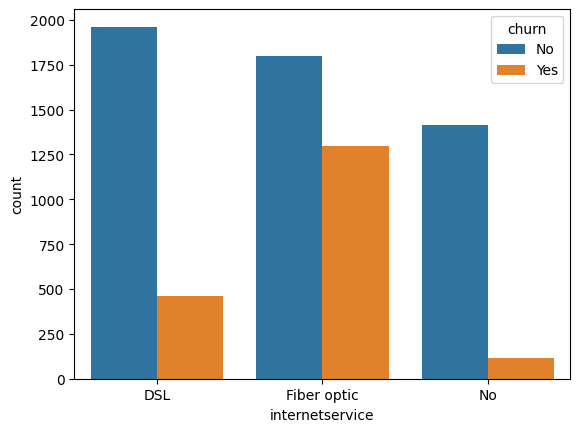

In [46]:
#do people with internet service churn more?
sns.countplot(data=df, x="internetservice", hue="churn")

In [ ]:
#answer the above question
df.pivot_table(index='internetservice', columns='churn', aggfunc='size')


churn,No,Yes
internetservice,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


###### internet service analysis shows that customers with fiber optic internet service have the highest churn rate, while those with DSL have a lower churn rate.
###### customers with no internet service have the lowest churn rate.

<Axes: xlabel='churn', ylabel='monthlycharges'>

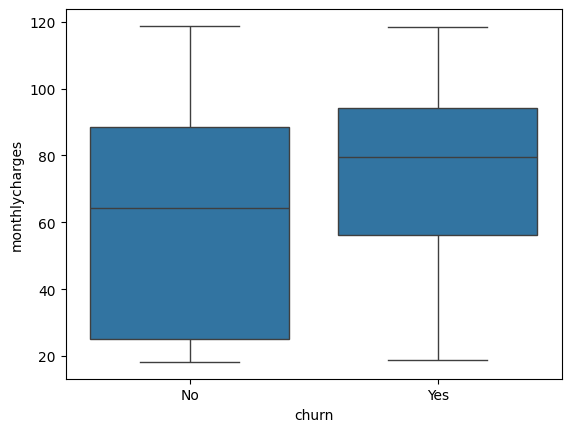

In [49]:
#what about monthly charges?
sns.boxplot(x='churn', y='monthlycharges', data=df)

In [ ]:
#answer the above question about monthly charges
df.pivot_table(index='churn', values='monthlycharges', aggfunc=['mean', 'median'])


,mean,median
,monthlycharges,monthlycharges
churn,,
No,61.265124,64.425
Yes,74.441332,79.650


###### monthly charges analysis shows that churners tend to have higher monthly charges compared to non-churners.

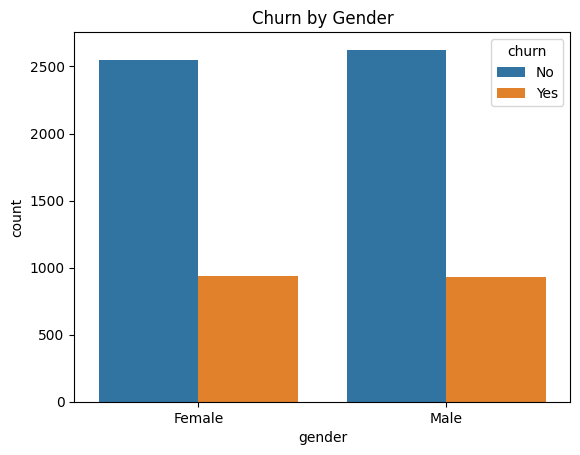

In [ ]:
#do different genders churn differently?
sns.countplot(data=df, x="gender", hue="churn")
plt.title("Churn by Gender")
plt.show()

In [ ]:
df.pivot_table(index='gender', columns='churn', aggfunc='size')


churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


###### gender analysis shows that there is no significant difference in churn rates between male and female

#### Preprocess for Machine Learning


In [54]:
#convert categorical variables to numerical for machine learning
#using Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'customerid':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
#define X and Y (what we want to predict/the answer column)
X = df.drop(['customerid', 'churn'], axis=1)  # All info about the customer
y = df['churn']  # What we want to predict/did they leave or stay


In [ ]:
#train-test split, using 80% of the data for training and 20% for testing(we let the model learn from some data and test it on new data to see how well it performs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train a Classifier (Random Forest)

In [ ]:
#train our model to look at clues and make predictions
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42) #create the robot
model.fit(X_train, y_train) #train it using customer data and whether they churned or not


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Evaluate Performance

In [ ]:
#give our robot(classifier) some data to predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test) #based on the clues it learned, it predicts whether the customers in the test set churned or not

print(confusion_matrix(y_test, y_pred)) #how many it got right and wrong
print(classification_report(y_test, y_pred)) #grade its performance(precision[how often it was right when it said leaving], recall[how many actual leavers it caught], f1-score[overall performance: balance between precision and recall])
print("Accuracy:", accuracy_score(y_test, y_pred)) #robot final score, how well it did overall out of 100%


[[944  92]
 [192 181]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy: 0.7984386089425124


###### 944 correct 'stay', 92 wrong 'stay'
###### 192 wrong 'leave' , 181 correct 'leave'
###### the robot was right 80% of the time!

#### interpret results

In [60]:
importances = model.feature_importances_
feature_names = X.columns
# Display feature importances
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance'])
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)  # Display the feature importances

                  importance
monthlycharges      0.176539
tenure              0.174955
totalcharges        0.167721
contract            0.081976
paymentmethod       0.051153
onlinesecurity      0.048006
techsupport         0.043074
onlinebackup        0.027847
gender              0.027486
paperlessbilling    0.026085
internetservice     0.024514
partner             0.024310
multiplelines       0.022742
deviceprotection    0.021655
dependents          0.020808
seniorcitizen       0.020452
streamingmovies     0.018083
streamingtv         0.017067
phoneservice        0.005527


###### feature importances can be interpreted to understand which features are most influential in predicting customer churn


In [61]:
#save the model for future use
import joblib
joblib.dump(model, 'customer_churn_model.pkl')  # Save the model to a file



['customer_churn_model.pkl']

In [62]:
#load the model later
# loaded_model = joblib.load('customer_churn_model.pkl')

In [ ]:
#use model to predict new customers/data
new_customer = X_test.iloc[0]  # i can use real new data here
prediction = model.predict([new_customer])
print("Will the customer churn?" , "Yes" if prediction[0] == 1 else "No")


Will the customer churn? Yes


c:\Users\savai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
# explain the prediction
import pandas as pd

# Show most important features the model used
importances = model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_df.head(10))


             Feature  Importance
17    monthlycharges    0.176539
4             tenure    0.174955
18      totalcharges    0.167721
14          contract    0.081976
16     paymentmethod    0.051153
8     onlinesecurity    0.048006
11       techsupport    0.043074
9       onlinebackup    0.027847
0             gender    0.027486
15  paperlessbilling    0.026085
